<a href="https://colab.research.google.com/github/GiangAnhTuan-20146450/Bai-Tap-AI/blob/main/Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b0d5ce911aee78bb7998c66f6070da226b792956705aa5e7950ce46577f90383
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


7.985763656130943


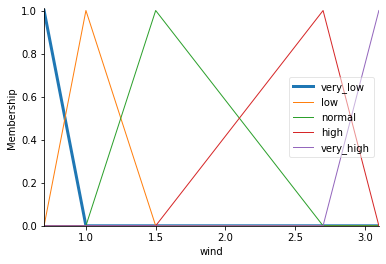

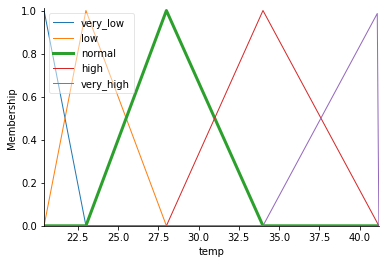

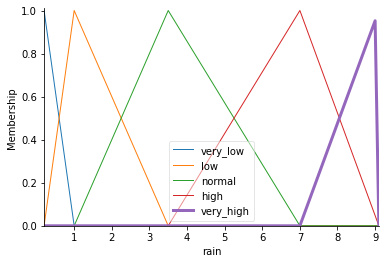

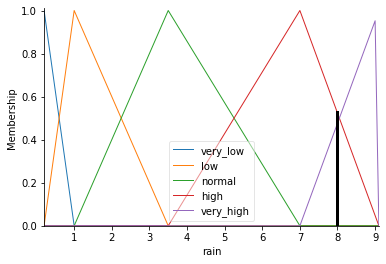

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')
temp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temp')
rain = ctrl.Consequent(np.arange(0.2,9.2,0.1),'rain')

wind['very_low']= fuzz.trimf(wind.universe,[0.7,0.7,1])
wind['low']= fuzz.trimf(wind.universe,[0.7,1,1.5])
wind['normal']= fuzz.trimf(wind.universe,[1,1.5,2.7])
wind['high']= fuzz.trimf(wind.universe,[1.5,2.7,3.1])
wind['very_high']= fuzz.trimf(wind.universe,[2.7,3.1,3.1])

temp['very_low']= fuzz.trimf(temp.universe,[20.4,20.4,23])
temp['low']= fuzz.trimf(temp.universe,[20.4,23,28])
temp['normal']= fuzz.trimf(temp.universe,[23,28,34])
temp['high']= fuzz.trimf(temp.universe,[28,34,41.2])
temp['very_high']= fuzz.trimf(temp.universe,[34,41.2,41.2])

rain['very_low']= fuzz.trimf(rain.universe,[0.2,0.2,1])
rain['low']= fuzz.trimf(rain.universe,[0.2,1,3.5])
rain['normal']= fuzz.trimf(rain.universe,[1,3.5,7])
rain['high']= fuzz.trimf(rain.universe,[3.5,7,9.1])
rain['very_high']= fuzz.trimf(rain.universe,[7,9.1,9.1])

wind['very_low'].view()
temp['normal'].view()
rain['very_high'].view()

rule1= ctrl.Rule(wind['very_low']&temp['very_low'],rain['very_low'])
rule2= ctrl.Rule(wind['very_low']&temp['low'],rain['very_low'])
rule3= ctrl.Rule(wind['very_low']&temp['normal'],rain['low'])
rule4= ctrl.Rule(wind['very_low']&temp['high'],rain['low'])
rule5= ctrl.Rule(wind['very_low']&temp['very_high'],rain['normal'])

rule6= ctrl.Rule(wind['low']&temp['very_low'],rain['very_low'])
rule7= ctrl.Rule(wind['low']&temp['low'],rain['very_low'])
rule8= ctrl.Rule(wind['low']&temp['normal'],rain['low'])
rule9= ctrl.Rule(wind['low']&temp['high'],rain['normal'])
rule10= ctrl.Rule(wind['low']&temp['very_high'],rain['normal'])

rule11= ctrl.Rule(wind['normal']&temp['very_low'],rain['low'])
rule12= ctrl.Rule(wind['normal']&temp['low'],rain['low'])
rule13= ctrl.Rule(wind['normal']&temp['normal'],rain['normal'])
rule14= ctrl.Rule(wind['normal']&temp['high'],rain['high'])
rule15= ctrl.Rule(wind['normal']&temp['very_high'],rain['high'])

rule16= ctrl.Rule(wind['high']&temp['very_low'],rain['low'])
rule17= ctrl.Rule(wind['high']&temp['low'],rain['normal'])
rule18= ctrl.Rule(wind['high']&temp['normal'],rain['high'])
rule19= ctrl.Rule(wind['high']&temp['high'],rain['high'])
rule20= ctrl.Rule(wind['high']&temp['very_high'],rain['high'])

rule21= ctrl.Rule(wind['very_high']&temp['very_low'],rain['normal'])
rule22= ctrl.Rule(wind['very_high']&temp['low'],rain['normal'])
rule23= ctrl.Rule(wind['very_high']&temp['normal'],rain['high'])
rule24= ctrl.Rule(wind['very_high']&temp['high'],rain['high'])
rule25= ctrl.Rule(wind['very_high']&temp['very_high'],rain['very_high'])

raining_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
raining= ctrl.ControlSystemSimulation(raining_ctrl)

raining.input['wind']=3.1
raining.input['temp']=41.2
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)